# Formation Machine Learning
## De la documentation
### Sur les notebooks

Allez voir
- http://dichotomies.fr/2015/informatique/info1/cours/debuter-avec-les-notebooks/
- https://blog.wax-o.com/2014/04/tutoriel-un-guide-pour-bien-commencer-avec-markdown/

### Gérér l'affichage des courbes

On va utiliser pyplot du module matplotlib pour afficher les courbes et les graphiques

La commande *%matplotlib inline* fait en sorte que les courbes apparaissent dans le notebook.

Si vous voulez sauvegarder les courbes sans les afficher, il faut ajouter la commande *matplotlib.use('Agg')* entre les 2 commandes suivantes :


In [1]:
# utiliser matplotlib
%matplotlib inline
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

## Machines à Vecteurs de Support (SVM)

Si anaconda3 n'est pas installé, il nous faut d'abord installer les modules nécessaires. 


In [2]:
"""
!pip3 -q install sklearn
!pip3 -q install matplotlib
!pip3 -q install seaborn
"""

'\n!pip3 -q install sklearn\n!pip3 -q install matplotlib\n!pip3 -q install seaborn\n'

## Première partie : prise en main des SVM
Cette partie est librement inspirée du travail de Jake VenderPlas, auteur du livre [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do). Son [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook) (en anglais) regorge de fichiers utiles.

Dans un premier temps, on va générer des données jouets, linéairement séparables :

/Users/marinetroadec/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


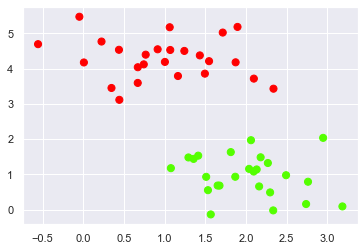

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

#Un petit environment qui donne de meilleurs graphes
import seaborn as sns; sns.set()

# fonction sklearn pour générer des données simples
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# Affichage des données
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism');

### SVM linéaire (=perceptron à vaste marge)
On va commencer par apprendre un SVM sans noyau (on dit "linéaire") à l'aide de scikit-learn :

In [4]:
#import de la classe - qui s'appelle SVC et pas SVM...
from sklearn.svm import SVC
#Définition du modèle
model = SVC(kernel='linear', C=1E10) # C : Paramètre de régularisation.
#Apprentissage sur les donnée
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

On va utiliser une fonction d'affichage qui va bien, où tout ce qui est nécessaire est affiché. Il ne faut pas forcément la comprendre complètement de suite car on reviendra plus bas sur les points importants.

In [5]:
import numpy as np

def affiche_fonction_de_decision(model, ax=None, plot_support=True):
    """Affiche le séparateur, les marges, et les vecteurs de support d'un SVM en 2D"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # création de la grille pour l'évaluation
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # affichage de l'hyperplan et des marges
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Affichage des vecteurs de support
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Voyons ce que cela donne sur notre séparateur linéaire à vaste marge :

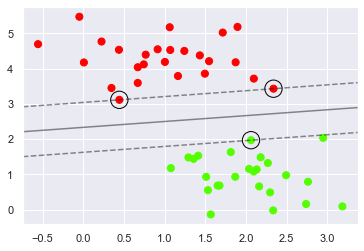

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')
affiche_fonction_de_decision(model);

Sur ce graphe, on voit le séparateur (ligne pleine), les vecteurs de support (points entourés) et la marge (matérialisée par des lignes discontinues).
On a ici le séparateur qui maximise la marge.
Scikit-learn nous permet, après apprentissage, de récupérer les vecteurs de supports:

In [7]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Seules trois données sont utiles pour classer de nouvelles données. On peut s'en assurer en rajoutant des données sans changer le modèle :


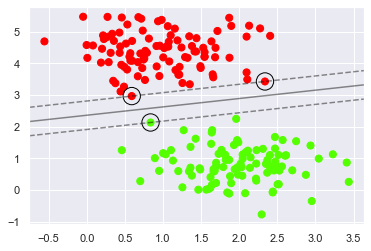

In [8]:
X2, y2 = make_blobs(n_samples=200, centers=2,
                  random_state=0, cluster_std=0.60)

model2 = SVC(kernel='linear', C=1E10)
model2.fit(X2, y2)

plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='prism')
affiche_fonction_de_decision(model2);

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

### SVM non linéaire
Comme vu en cours, la puissance des séparateurs linéaires est limitée (à des données linéairement séparables). Mais il est possible de contourner cette limitation par l'utilisation de noyaux.

On va commencer par générer des données non-linéairement séparables, puis on apprend un classifieur SVM linéaire et on affiche le résultat :

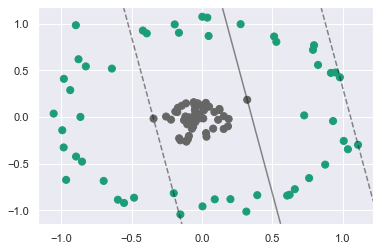

In [10]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
affiche_fonction_de_decision(clf, plot_support=False)

Clairement notre apprentissage de séparateur linéaire a échoué...

On va manuellement ajouter une troisième dimension *z* :

In [12]:
z = np.exp(-(X ** 2).sum(1))

On peut afficher les données augmentées et se rendre compte qu'elles sont linéairement séparables dans ce nouvel espace de dimension plus grande :

Text(0.5, 0, 'z')

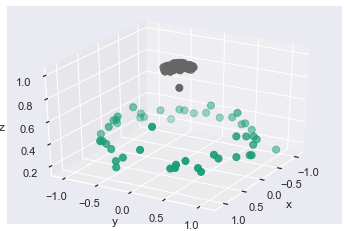

In [13]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], z, c=y, s=50, cmap='Dark2')
ax.view_init(elev=30, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Le plan définit par z=0.7 (par exemple) sépare les 2 classes parfaitement.

Bien entendu, la projection en plus grande dimension est capitale, et en choisissant un autre calcul pour *z* on aurait probablement obtenu des données non linéairement séparables.

Et s'il fallait faire effectivement la projection, cela limiterait drastiquement la dimension de l'espace de plongement ainsi que le nombre de données traitables. C'est pourquoi l'utilisation de noyaux (kernels en anglais) est d'une grande efficacité.

En Scikit-Learn, il suffit de modifier le paramètre *kernel* : jusqu'à présent, nous avons utilisé 'linear' comme valeur. On peut par exemple utiliser *rbf* pour 'radial basis function', le noyau gaussien (celui qui transforme notre espace de description initial vers le 3D avec $z$ précédent), et il nous reste à trouver la bonne valeur du paramètre :

In [15]:
clf = SVC(kernel='rbf', C=1E10)
clf.fit(X, y)

SVC(C=10000000000.0)

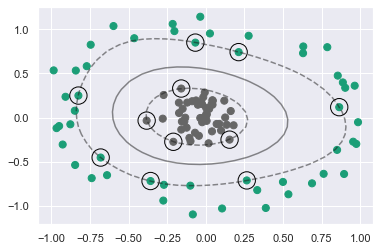

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
affiche_fonction_de_decision(clf) 

**Exercice** : exécuter les instructions permettant un apprentissage avec un autre noyau -- pour un plongement dans un autre espace (par exemple noyau polynomial de degré 5), et la visualisation du séparateur. Vous devriez constater que ce n'est pas un noyaux très adapté !

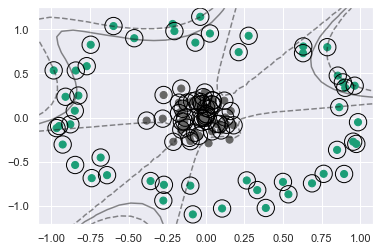

In [17]:
# a vous
clf = SVC(kernel='poly', degree=5)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
affiche_fonction_de_decision(clf) 

On voit ici que le séparateur (et la marge associée) ne sont pas linéaire dans l'espace des données, mais qu'ils peuvent s'y représenter sans difficulté.

Notons aussi que le nombre de vecteurs de support reste très petit.

### SVM à marge douce

Il est aussi possible que le problème soit linéairement séparable (dans la dimension initiale des données ou dans un plongement) mais que le bruit (=la mauvaise qualité des données) empêche l'apprenant de trouver un séparateur.

On utilise alors ce que l'on appelle un classifieur à marge douce : on autorise certains points à être dans la marge, voire du mauvais côté de l'hyperplan. C'est le role du paramètre *C* : pour des grosses valeurs, on est quasiment en marge dure, mais plus *C* prend des petites valeurs, plus les marges deviennent permissibles.

On va prendre des données qui se chevauchent un peu : (à ce stade, il est important de comprendre la spécificité des données que l'on génére ci-après: en cas de doute appelez votre enseignant)

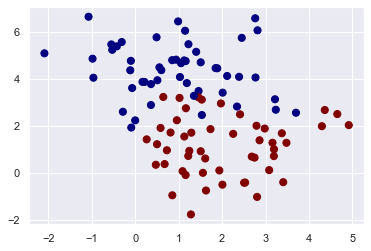

In [18]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet');

On joue alors avec la valeur de *C*

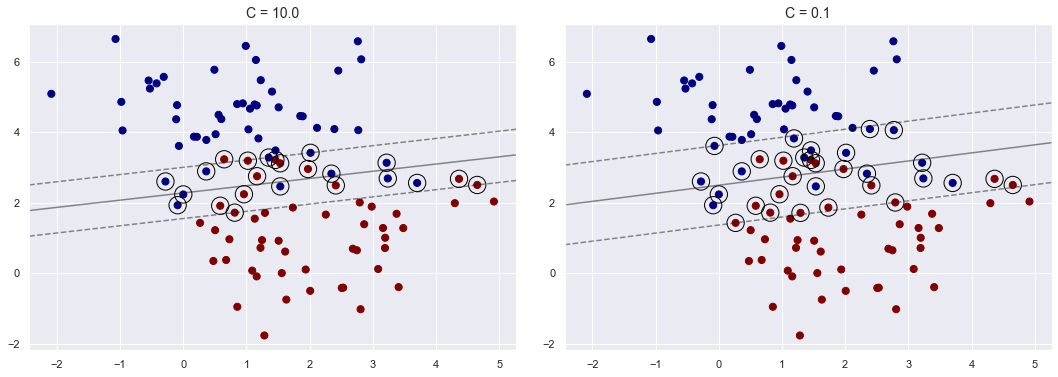

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    affiche_fonction_de_decision(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Bien entendu, il est possible de combiner l'utilisation d'un noyau et de marges douces.

**Exercice** : Utiliser la fonction make_circles pour créer deux clusters gaussiens comme précédemment, avec un bruit dans les données assez élevé, puis entraîner un SVM marges douces avec noyau gaussien (rbf), et visualiser le résultat. Vous devriez constater l'augmentation du nombre de vecteurs supports nécessaire à cause du bruit.

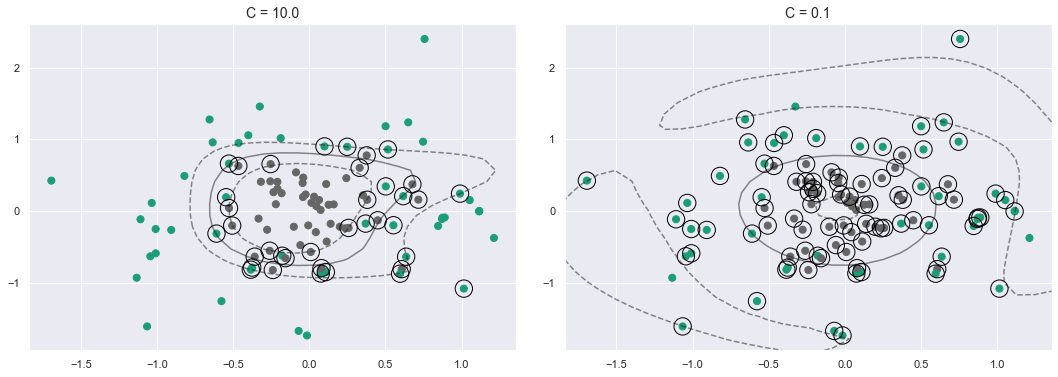

In [14]:
# a vous
from sklearn.datasets.samples_generator import make_circles

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

X, y = make_circles(100, factor=.1, noise=.4)

#clf = SVC(kernel='rbf', C= 10).fit(X, y)

#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
#affiche_fonction_de_decision(clf, plot_support=False)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Dark2')
    affiche_fonction_de_decision(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

### Paramétrer (tuner) un SVM
Tous les noyaux sont paramétrés : il est question ici d'étudier l'impact d'un (hyper)paramètre sur la qualité de l'apprentissage.
Pour cela, on va générer des données qui ne sont pas linéairement séparables :

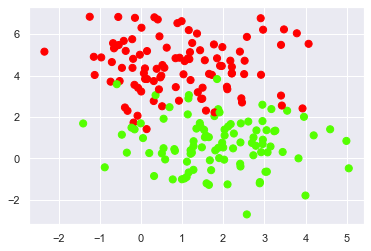

In [21]:
X, y = make_blobs(n_samples=200, centers=2,
                  random_state=0, cluster_std=1.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')

On va étudier 2 noyaux différents
- le noyau polynomial (*kernel='poly'*) qui a 2 paramètres, *degree* qu'il faut faire varier entre 2 et 6 (au minimum), et *C* (lié à la 'douceur' de la marge)
- le noyau gaussien (*kernel='rbf'*) qui a aussi 2 paramètres, *gamma*, qu'il faut faire varier de 1 à 0.01, et *C* 

A chaque fois, en plus de l'affichage des séparateurs, et de l'estimation de l'erreur, il serait intéressant de regarder combien de vecteurs de support le classifieur appris a besoin.

Nombre de vecteurs de support (sur 200 données) : 26


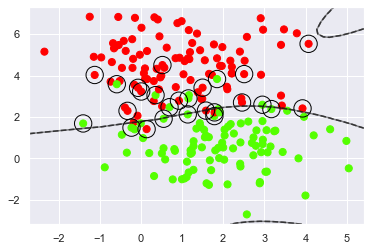

In [22]:
#Exemple avec le noyau gaussien et des valeurs pour gamma et C
clf = SVC(kernel='rbf', gamma=0.01, C=1E10)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')
affiche_fonction_de_decision(clf) 
print("Nombre de vecteurs de support (sur 200 données) :", len(clf.support_vectors_))

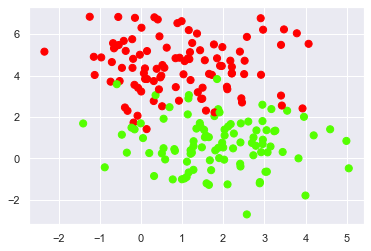

In [23]:
X_test, y_test = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')

A vous de jouer ! (pour chaque noyau, faire varier les hyper-paramètres dans les intervalles mentionnés, et pour chaque couple d'hyper-paramètres : afficher la frontière de décison, le nombre de vecteurs supports du modèle (le plus petit est le mieux), et le score estimé sur un échantillon test de taille 100 généré de la même façon que l'échantillon d'apprentissage.

Cas du noyau gaussien
Dans les conditions C = 0.1 gamma = 0.0 le nombre de vecteur support est de  26
Le score associé est score = 0.9
Dans les conditions C = 0.1 gamma = 0.2 le nombre de vecteur support est de  26
Le score associé est score = 0.9
Dans les conditions C = 0.1 gamma = 0.4 le nombre de vecteur support est de  26
Le score associé est score = 0.9
Dans les conditions C = 0.1 gamma = 0.6 le nombre de vecteur support est de  26
Le score associé est score = 0.9
Dans les conditions C = 0.1 gamma = 0.8 le nombre de vecteur support est de  26
Le score associé est score = 0.9
Dans les conditions C = 2.1 gamma = 0.0 le nombre de vecteur support est de  26
Le score associé est score = 0.9
Dans les conditions C = 2.1 gamma = 0.2 le nombre de vecteur support est de  26
Le score associé est score = 0.9
Dans les conditions C = 2.1 gamma = 0.4 le nombre de vecteur support est de  26
Le score associé est score = 0.9
Dans les conditions C = 2.1 gamma = 0.6 le nombre de vecteur support est d

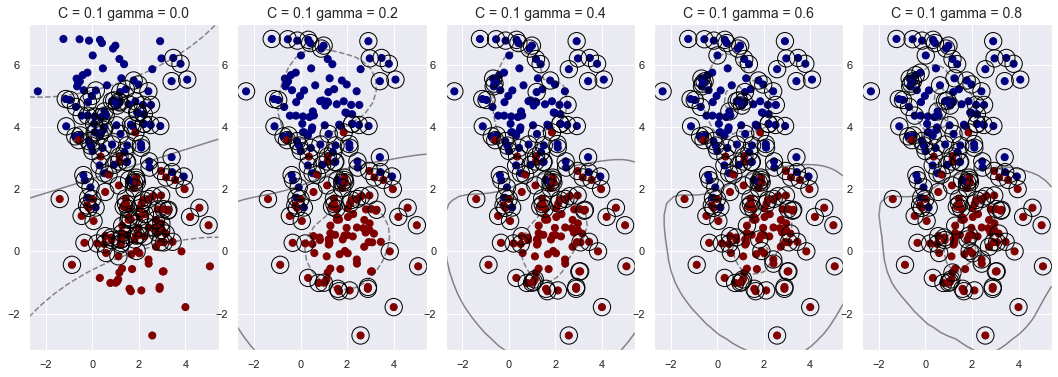

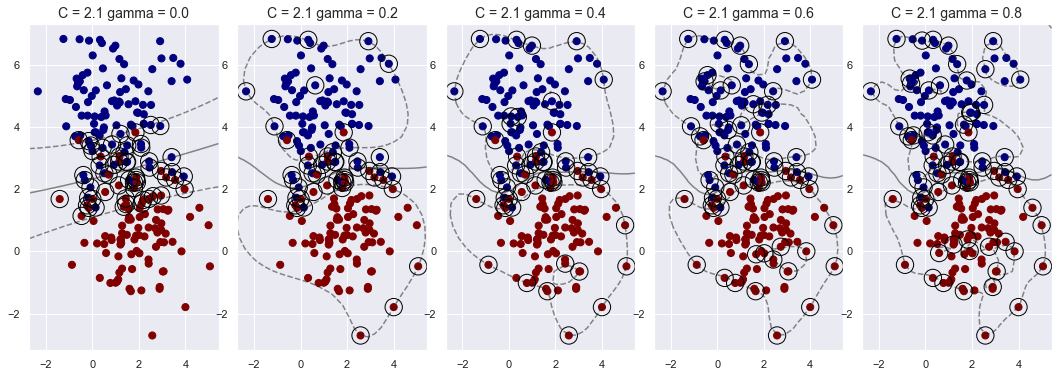

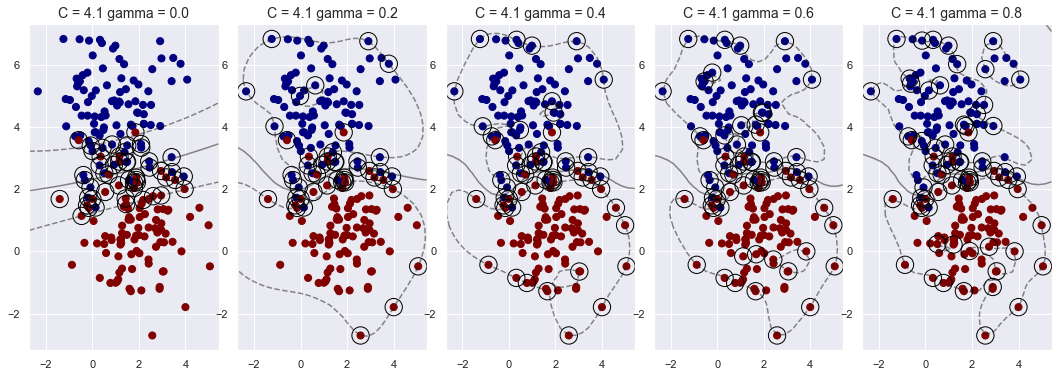

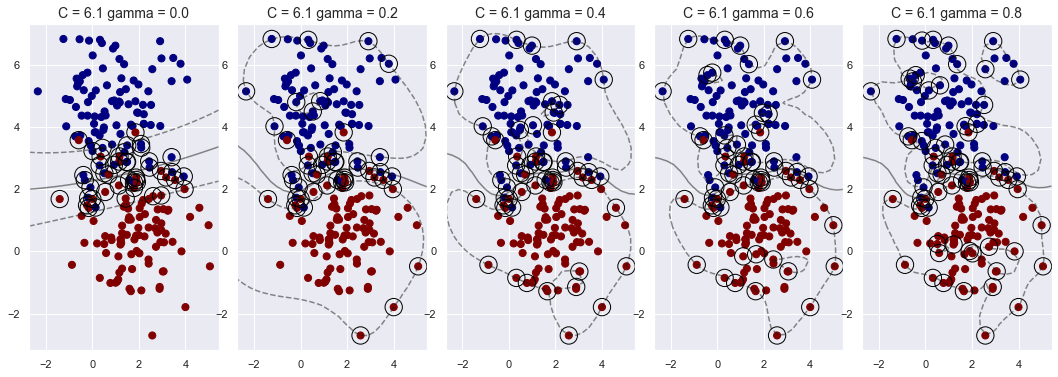

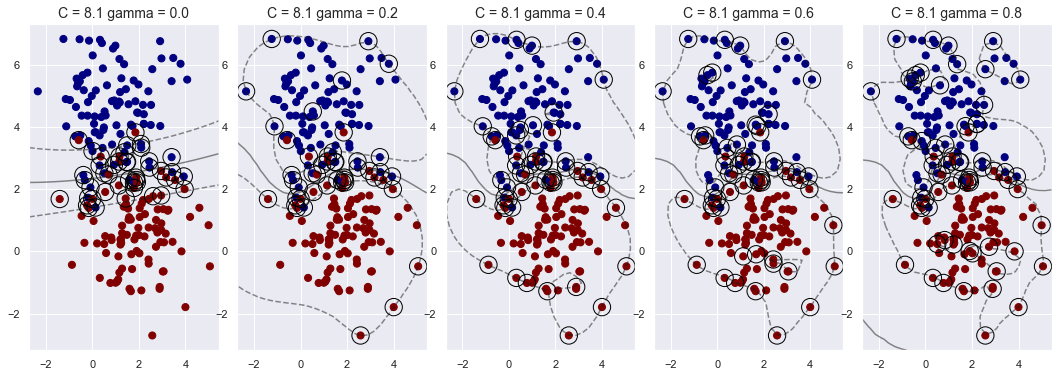

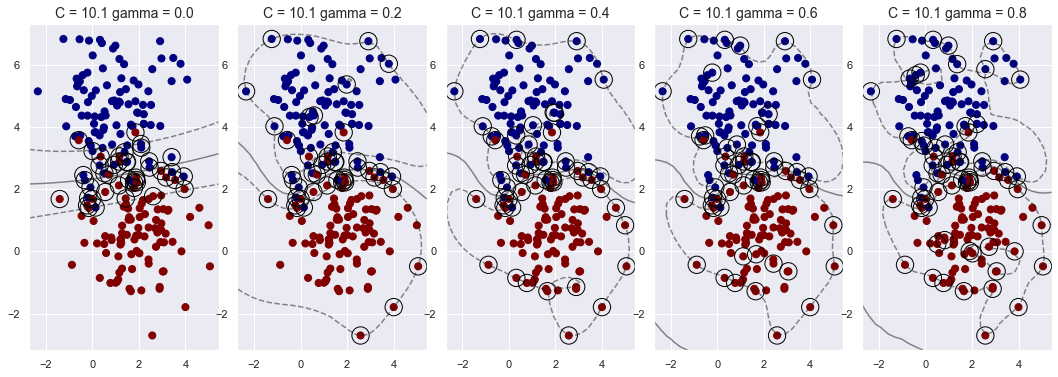

In [24]:
print("Cas du noyau gaussien")
for C in [i+0.1 for i in range(0,11,2)]:
    fig, ax = plt.subplots(1, 5, figsize=(16, 6))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
    for axi, gamma in zip(ax, [i/100 for i in range(1,100, 20)]):
        model = SVC(kernel='rbf', C=C, gamma = gamma).fit(X, y)
        axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
        affiche_fonction_de_decision(model, axi)
        axi.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=300, lw=1, facecolors='none');
        axi.set_title('C = {0:.1f}'.format(C)+' gamma = {0:.001f}'.format(gamma), size=14)
        score = model.score(X_test, y_test)
        print('Dans les conditions C = {0:.1f}'.format(C)+' gamma = {0:.001f}'.format(gamma)+
              ' le nombre de vecteur support est de ', len(clf.support_vectors_))
        print('Le score associé est score = {0:.1}'.format(score))

Cas du noyau polynomial
Nombre de vecteurs de support (sur 200 données) :
Dans les conditions C = 0.1 degree = 2.0 26
Le score associé est score = 0.9
Dans les conditions C = 0.1 degree = 3.0 26
Le score associé est score = 0.9
Dans les conditions C = 0.1 degree = 4.0 26
Le score associé est score = 0.9
Dans les conditions C = 0.1 degree = 5.0 26
Le score associé est score = 0.9
Dans les conditions C = 0.1 degree = 6.0 26
Le score associé est score = 0.9
Dans les conditions C = 2.1 degree = 2.0 26
Le score associé est score = 0.9
Dans les conditions C = 2.1 degree = 3.0 26
Le score associé est score = 0.9
Dans les conditions C = 2.1 degree = 4.0 26
Le score associé est score = 0.8
Dans les conditions C = 2.1 degree = 5.0 26
Le score associé est score = 0.8
Dans les conditions C = 2.1 degree = 6.0 26
Le score associé est score = 0.9
Dans les conditions C = 4.1 degree = 2.0 26
Le score associé est score = 0.9
Dans les conditions C = 4.1 degree = 3.0 26
Le score associé est score = 0.9
Da

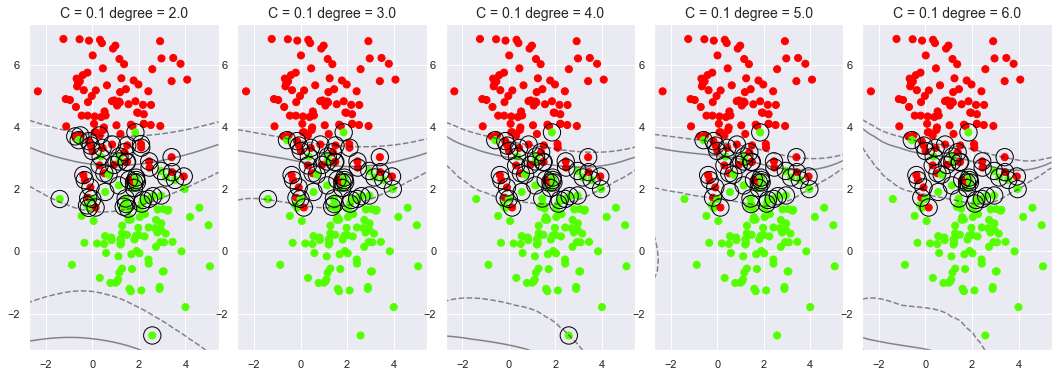

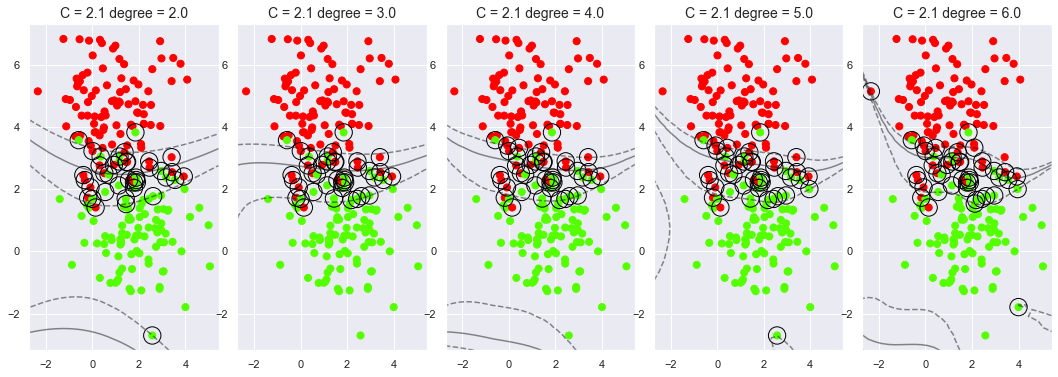

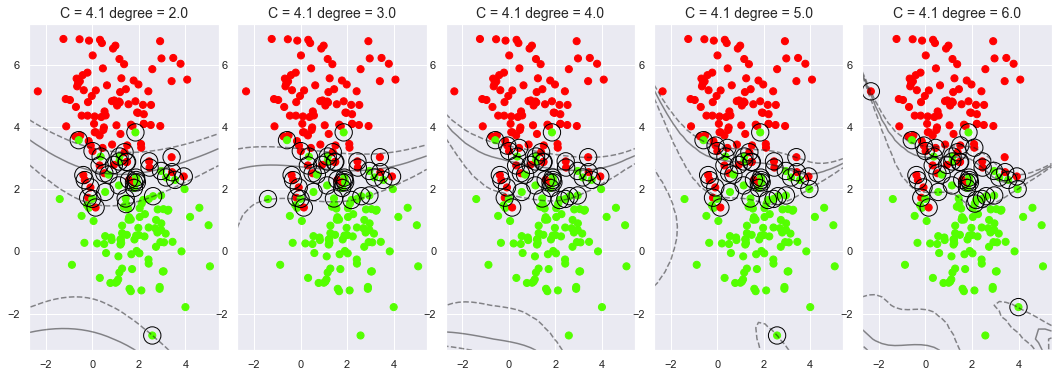

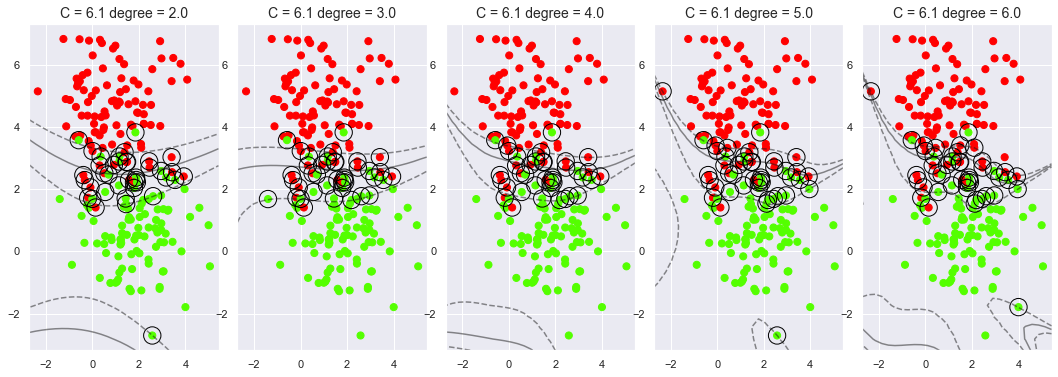

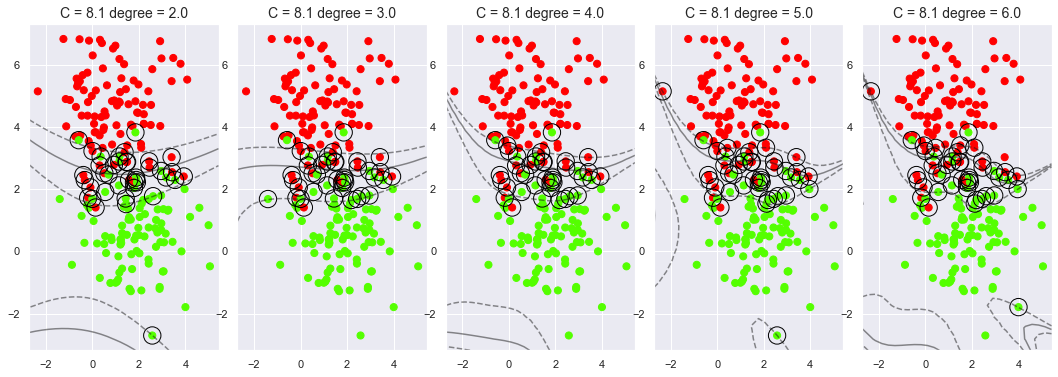

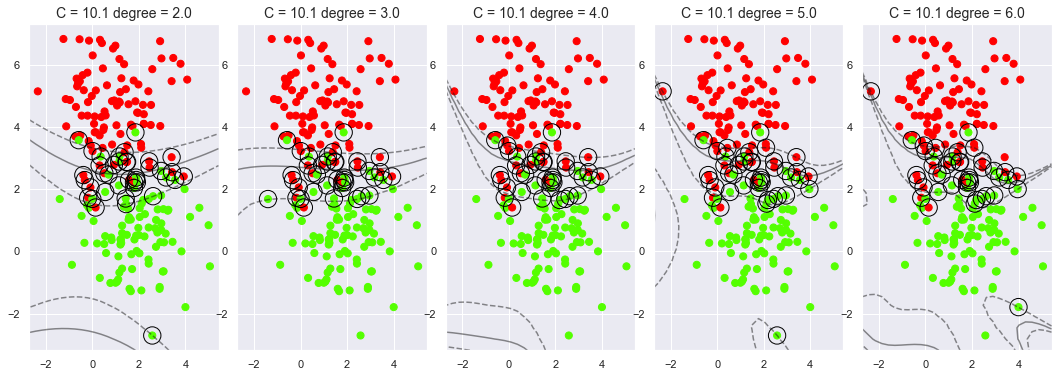

In [25]:
print("Cas du noyau polynomial")
print("Nombre de vecteurs de support (sur 200 données) :")
for C in [i+0.1 for i in range(0,11,2)]:
    fig, ax = plt.subplots(1, 5, figsize=(16, 6))
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
    for axi, degree in zip(ax, [float(i) for i in range(2,7, 1)]):
        model = SVC(kernel='poly', C=C, degree = degree).fit(X, y)
        axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='prism')
        affiche_fonction_de_decision(model, axi)
        axi.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=300, lw=1, facecolors='none');
        axi.set_title('C = {0:.1f}'.format(C)+' degree = {0:.001f}'.format(degree), size=14)
        score = model.score(X_test, y_test)
        print('Dans les conditions C = {0:.1f}'.format(C)+' degree = {0:.001f}'.format(degree), 
              len(clf.support_vectors_))
        print('Le score associé est score = {0:.1}'.format(score))

In [ ]:
# trouver les meilleurs paramètres 

## Deuxième partie : un traitement (presque) complet
### Préparation des données
Nous allons utiliser un jeu de données réel - tiré de *Tsanas & Xifara : Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools, Energy and Buildings, Vol. 49, pp. 560-567, 2012* - qui vous est fourni avec l'énoncé.

Les 8 premières colonnes correspondent aux attributs descriptifs et les deux dernières, aux charges de chauffage et de climatisation (dans cet ordre).
Pour les utiliser en Python, vous pourrez vous servir du code suivant :

In [26]:
data = np.loadtxt("./data.csv")
X = data[:,:-2]
Y = data[:,-2:]
Yheat = Y[:,0]
Ycool = Y[:,1]

Le problème initial, tel que présenté ici, est un problème de régression. Nous allons d'abord le transformer en problème de classification. Par une méthode de clustering, on veut répartir les charges de chauffage et de climatisation en 3 classes : faibles, moyennes, élevées.

A vous de jouer :

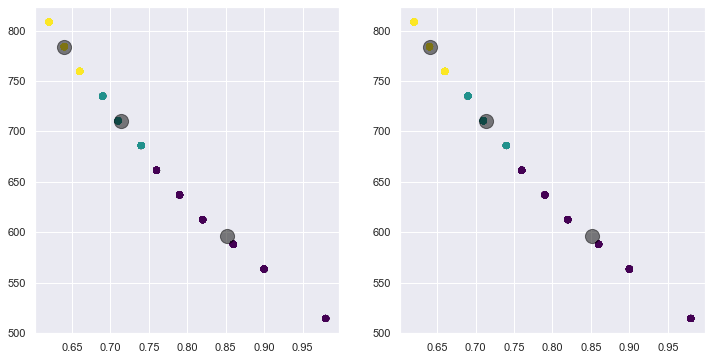

In [27]:
from sklearn.cluster import KMeans

km = KMeans(3)

Yheat_vector = Yheat.reshape(-1,1)
Ycool_vector = Ycool.reshape(-1,1)

XYheat = np.concatenate((X,Yheat_vector), axis=1)
XYcool = np.concatenate((X,Ycool_vector), axis=1)

km_heat = km.fit(XYheat)
km_cool = km.fit(XYcool)

fig, ax = plt.subplots(1,2, figsize=(12, 6))

ax[0].scatter(XYheat[:, 0], XYheat[:, 1], c=km_heat.labels_, cmap='viridis')
centers_h = km_heat.cluster_centers_
ax[0].scatter(centers_h[:, 0], centers_h[:, 1], c='black', s=200, alpha=0.5);

ax[1].scatter(XYcool[:, 0], XYcool[:, 1], c=km_cool.labels_, cmap='viridis')
centers_c = km_cool.cluster_centers_
ax[1].scatter(centers_c[:, 0], centers_c[:, 1], c='black', s=200, alpha=0.5);

In [28]:
print(km_heat.labels_.all() == km_cool.labels_.all()) 

True


### Apprentissage
Nous voulons comparer plusieurs méthodes d'apprentissage :
1. Les k-plus proches voisins (*KNeighborsClassifier* de la classe *sklearn.neighbors*, hyperparamètre à régler : *n_neighbors*)
2. Les arbres de décision  (*DecisionTreeClassifier* de la classe *sklearn.tree*, hyperparamètre à régler : *max_depth*)
3. Perceptron linéaire (*Perceptron* de la classe *sklearn.linear_model*, hyperparamètre à régler : aucun/*max_iter* en sklearn 0.19 ou plus récent)
4. SVM à noyau gaussien  (*SVC* avec *kernel='rbf'* de la classe *sklearn.svm*, hyperparamètre à régler : *gamma*)
5. SVM à noyau polynomial (*SVC* avec *kernel='poly'* de la classe *sklearn.svm*, hyperparamètre à régler : *degree*)

Ecrivez le code permettant de :
1. Séparer les données en un échantillon d'apprentissage et un échantillon de test (80/20)
2. Sélectionner les meilleurs valeurs des hyperparamètres sur l'échantillon d'apprentissage par validation croisée en utilisant 10 folders

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, km_heat.labels_, test_size=0.20, random_state=42)

In [30]:
score = []

In [31]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

neig = [i for i in range(1,11)]

sous_score = []
for i in neig :
    
    knn= KNeighborsClassifier(n_neighbors=i)
    hnn = knn.fit(X_train, y_train) 
    sous_score.append(knn.score(X_test, y_test))

score.append(sous_score)

In [32]:
#DecisionTreeClassifier
from sklearn import tree

depth = [i for i in range(1,11)]

sous_score = []

for i in depth :
    
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)

    sous_score.append(clf.score(X_test, y_test))

score.append(sous_score)

In [33]:
#Perceptron
from sklearn.linear_model import Perceptron 

sous_score = []

for i in range(1,11) : 
    pcp = Perceptron()
    pcp.fit(X_train,y_train)

    sous_score.append(pcp.score(X_test, y_test))

score.append(sous_score)

In [34]:
#SVC avec kernel='rbf'

gam = [i for i in range(1,11)]

sous_score = []

for i in gam : 

    model = SVC(kernel='rbf', C=1E10, gamma = i)
    model.fit(X_train, y_train)

    sous_score.append(model.score(X_test, y_test))

score.append(sous_score)

In [35]:
#SVC avec kernel='poly' 

deg = [i for i in range(1,11)]

sous_score = []

for i in deg : 
    
    model = SVC(kernel='poly', C=1E10, degree = i)
    model.fit(X_train, y_train)

    sous_score.append(model.score(X_test, y_test))

score.append(sous_score)

### Analyse des résultats
Afficher sur une courbe les scores de chacun des algorithmes avec la meilleure valeur d'hyperparamètre possible sur l'échantillon de test.

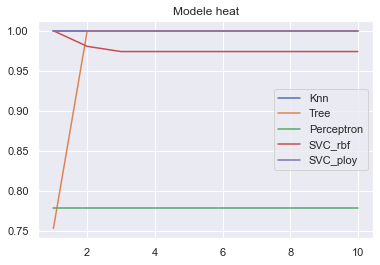

In [36]:
x = [i for i in range(1,11)]
mode = ['Knn', 'Tree', 'Perceptron', 'SVC_rbf', 'SVC_ploy']
# plot lines 
i = 0
for sco in score : 
    plt.plot(x, sco, label = "{0}".format(mode[i]))
    i+=1
plt.legend() 
plt.title('Modele heat')
plt.show()

Pour chacune des méthodes, pour chaque meilleur hyperparamètre, calculer l'intervalle à 95% de confiance auquel le score doit appartenir en utilisant les résultats de la validation croisée. Si vous ne vous souvenez plus de comment on calcule un intervalle de confiance, vous pouvez consulter : https://fr.wikihow.com/calculer-un-intervalle-de-confiance

In [37]:
inter_conf = []
for i in score : 
    inter_conf.append([np.mean(i)-1.96*np.std(i)/np.sqrt(len(i)),np.mean(i)+1.96*np.std(i)/np.sqrt(len(i))])
    

In [38]:
for i,j in zip(inter_conf,mode) : 
    print('L\'intervalle de confiance avec la méthode ', j, 'est ', i)

L'intervalle de confiance avec la méthode  Knn est  [1.0, 1.0]
L'intervalle de confiance avec la méthode  Tree est  [0.9294429012735049, 1.0212064493758455]
L'intervalle de confiance avec la méthode  Perceptron est  [0.7792207792207793, 0.7792207792207793]
L'intervalle de confiance avec la méthode  SVC_rbf est  [0.9724263262053594, 0.9821191283400952]
L'intervalle de confiance avec la méthode  SVC_ploy est  [1.0, 1.0]


Quelle méthode est la meilleure pour prédire la classe de frais de chauffage ? De frais de climatisation ?

# Troisième partie

Maintenant que les SVM en classification sont bien compris et appliqués (le paramètre C doit être bien estimé), notamment dans l'impact du choix du noyau, nous allons comparer la qualité de différents noyaux sur les données digits, selon deux descripteurs (tableaux de pixels et histogrammes de niveaux de gris). 

* Définir précisément le protocole expérimental pour comparer finement les performances (erreur moyenne sur l'ensemle des classes) de plusieurs SVM selon la fonction noyau choisie, le meilleur hyper-paramétrage, et selon le descripteur choisi pour les images, avec prise en considération des intervalles de confiance. 

* Mettre en oeuvre ce protocole et conclure sur le modèle le plus performant

*BONUS*. Produire une fonction permettant de comparer deux algorithmes sur un même descripteur et un même dataset (ex. SVM noyau gaussien et SVM noyau polynomial) sur tous les datasets disponibles sur sklearn. En abscisse un algorithme, en ordonnée l'autre, et chaque point est le résultat en terme d'erreur de l'apprentissage sur un dataset. Sauvegardez ce code sous une fonction, il vous servira souvent par la suite.

(1797, 64)


<Figure size 432x288 with 0 Axes>

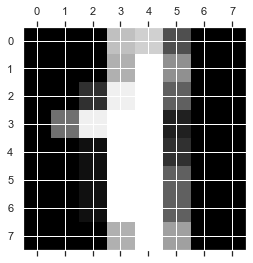

In [39]:
from sklearn.datasets import load_digits
digits = load_digits()

print(digits.data.shape)

plt.gray() 
plt.matshow(digits.images[1]) 
plt.show() 

In [40]:
def err_par_classe(pred , y) : 
    val_possibles = np.unique(y).tolist()
    count = [0 for i in range(len(val_possibles))]
    err = [0 for i in range(len(val_possibles))]
    for j in range(len(y)) : 
        count[val_possibles.index(y[j])]+= 1
        if pred[j] != y[j] : 
            err[val_possibles.index(y[j])] += 1      
    for i in range(len(err)) :
        err[i] /= count[i]
    return err
            

In [41]:
def err(pred , y) : 
    err = 0
    for j in range(len(y)) : 
        if pred[j] != y[j] : 
            err += 1      
    return err/len(y)

In [42]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=True)

c = [i/100 for i in range(1,10000, 100)] # pas à changer
score = []
error = []
for i in c :  
    clf_rbf = SVC(kernel='rbf', C=i)
    clf_rbf.fit(X_train, y_train)
    score.append(clf_rbf.score(X_test, y_test))
    error.append(err(clf_rbf.predict(X_test),y_test))
    


In [51]:
inter_conf = []
inter_conf.append([np.mean(score)-1.96*np.std(score)/np.sqrt(len(score)),np.mean(score)+1.96*np.std(score)/np.sqrt(len(score))])

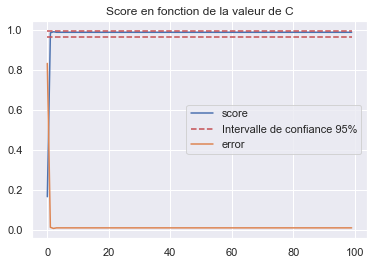

In [77]:
plt.plot(c, score, label = "score")
plt.plot(c, [inter_conf[0][0] for i in range(len(score))] , "r--", label = "Intervalle de confiance 95%")
plt.plot(c, [inter_conf[0][1] for i in range(len(score))] , "r--")
plt.plot([i for i in range(100)], error, label = "error")
plt.legend() 
plt.title('Score en fonction de la valeur de C')
plt.show()

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid =[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'degree': [1,2,3,4,5], 'kernel': ['poly']},]
 

clf = GridSearchCV(SVC(), param_grid)
clf.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [1, 2, 3, 4, 5],
                          'kernel': ['poly']}])

In [75]:
sorted(clf.cv_results_.keys())
clf.best_estimator_

SVC(C=10, gamma=0.001)

Le meilleur modèle est le SVC rbf aces comme paramètre C = 10 et gamma = .001. Ceci correspond aux réslutats précédents.  